In [1]:
import geopandas as geopd
import matplotlib.pyplot as plt
import folium
import pandas as pd
import numpy as np

In [2]:
df = geopd.read_file("data/geo/df_subdistritos.geojson",)
print(df.shape)
df.head()

(19, 4)


,ID,CD_GEOCODS,NM_SUBDIST,geometry
0,962,53001080506,BRAS�LIA,(POLYGON ((-47.9283381448399 -15.8069306185135...
1,963,53001080507,GAMA,(POLYGON ((-48.1560591939888 -15.9374997036552...
2,964,53001080508,TAGUATINGA,(POLYGON ((-48.1083694772898 -15.7900751657173...
3,965,53001080509,BRAZL�NDIA,(POLYGON ((-48.17372114159279 -15.750792030020...
4,966,53001080510,SOBRADINHO,(POLYGON ((-48.03370053088629 -15.557536208005...


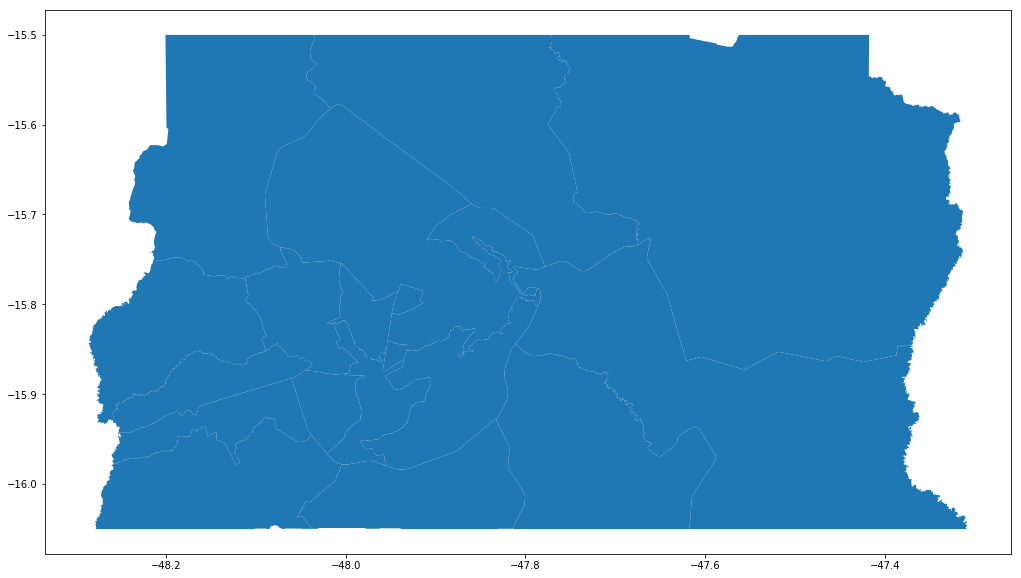

In [3]:
df.plot(figsize=(20,10))

In [4]:
mapa = folium.Map([-15.7882294,-47.8884416], zoom_start = 10)
mapa

In [5]:
df.CD_GEOCODI = pd.to_numeric(df.CD_GEOCODS, errors='coerce')

C:\Users\01079979166\AppData\Local\Continuum\anaconda3\lib\site-packages\geopandas\geodataframe.py:65: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)


In [6]:
# Cria uma coluna com números aleatórios para testarmos o choropleth
df['random'] = np.random.randint(1, 6, df.shape[0])

In [9]:
folium.Choropleth(
    geo_data=df.to_json(),
    name='choropleth',
    data=df,
    columns=['ID', 'random'],
    key_on='feature.properties.ID',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Rate (%)'
).add_to(mapa)

In [8]:
mapa.save('teste.html')